In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz
import graphviz

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [8]:
df_raw = pd.read_csv("rawdata/통신고객이탈.csv")
df_raw.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [9]:
import numpy as np
df_raw["CHURN"] = np.where(df_raw["CHURN"] == "Active", 0, 1)
df_raw["GENDER"] = np.where(df_raw["GENDER"] == "F", 0, 1)
df_raw = df_raw.drop(["CUSTOMER_ID"], axis = 1)
df_raw = pd.get_dummies(df_raw)

df_raw.head()

,CHURN,GENDER,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0,0,31,33.33,6,218,379.8,9,21.6,366,...,0,0,0,0,0,0,1,0,0,0
1,0,1,27,30.87,10,373,656.4,11,28.0,411,...,0,0,0,0,0,0,1,0,0,0
2,0,1,27,49.40,11,260,582.0,0,0.0,265,...,0,0,0,0,0,0,1,0,0,0
3,0,1,61,48.60,1,294,661.8,14,101.5,326,...,0,0,0,0,0,0,1,0,0,0
4,0,0,52,56.03,0,221,555.6,7,25.0,274,...,0,0,0,0,0,0,1,0,0,0


In [10]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)

df_train_y = df_train["CHURN"]
df_train_x = df_train.drop(["CHURN"], axis = 1)
df_test_y = df_test["CHURN"]
df_test_x = df_test.drop(["CHURN"], axis = 1)

In [15]:
knn_uncustomized = KNN()
knn_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(knn_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(knn_uncustomized.score(df_test_x, df_test_y)))

# 과대적합

Accuracy on training set: 0.820
Accuracy on test set: 0.803


In [16]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNN(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.717
1,2,0.851,0.821
2,3,0.843,0.792
3,4,0.825,0.821
4,5,0.820,0.803
5,6,0.822,0.839
6,7,0.819,0.828
7,8,0.806,0.835
8,9,0.810,0.832
9,10,0.805,0.839


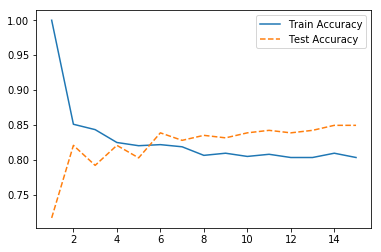

In [19]:
plt.plot(para_n_neighbors, train_accuracy, linestyle = '-', label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = '--', label = "Test Accuracy")
plt.legend()

In [ ]:
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range (1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNN(n_neighbors = v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))
    
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy

df_accuracy_neighbors.round(3)